In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [4]:
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [7]:
#scale data
train_data /=255.0
test_data /=255.0

In [8]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [45]:
dimData

784

In [36]:
from sklearn.model_selection import GridSearchCV


act = ['tanh', 'sigmoid']
for x in act:
    print("It is"+x+"*"*12)
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(dimData,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation=x))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

    [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
    print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

It istanh************
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2792 - acc: 0.9129 - val_loss: 0.1934 - val_acc: 0.9416
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0912 - acc: 0.9732 - val_loss: 0.1022 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0585 - acc: 0.9820 - val_loss: 0.0807 - val_acc: 0.9766
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0412 - acc: 0.9867 - val_loss: 0.0950 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0307 - acc: 0.9901 - val_loss: 0.0896 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0233 - acc: 0.9930 - val_loss: 0.0758 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0193 - acc: 0.9938 - val_

In [37]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
# model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.3266 - acc: 0.8962 - val_loss: 0.2020 - val_acc: 0.9347
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1043 - acc: 0.9679 - val_loss: 0.1153 - val_acc: 0.9644
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0758 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0462 - acc: 0.9851 - val_loss: 0.0709 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0850 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0248 - acc: 0.9920 - val_loss: 0.1126 - val_acc: 0.9685
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0847 - val_acc

In [38]:
history.history['val_loss']

[0.20197740687727928,
 0.11533135791271924,
 0.07580165877286345,
 0.07092618426312693,
 0.0849894767452497,
 0.1126298077115789,
 0.08469186341919122,
 0.0869322195543762,
 0.0836570037335885,
 0.08401499456650491,
 0.09720526321379876,
 0.09646713221969112,
 0.10466937708094265,
 0.12516509830505146,
 0.11723229382448062,
 0.10631278754866288,
 0.1126680116730453,
 0.14671802926845848,
 0.11308565158005908,
 0.1234469336341019]

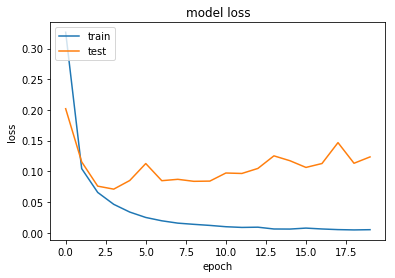

In [39]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

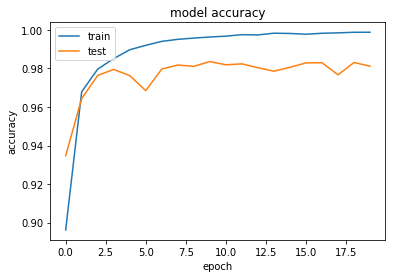

In [40]:
# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The prediction of the 30th in the test dataset is:  [7]


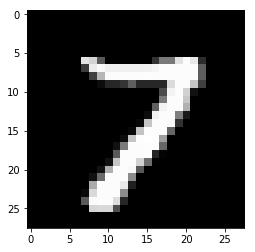

In [42]:
#display the test image in the training data
predict_test = model.predict_classes(test_data[[34], :])
print("The prediction of the 30th in the test dataset is: ", predict_test)

plt.imshow(test_images[34,:,:],cmap='gray')
plt.show()

In [43]:
!pwd

/private/var/folders/25/gq4tlb6d1_l29d_dm4gcd27m0000gn/T/imageclassification.py


In [44]:
!ls

DL ICP2.ipynb DL ICP3.ipynb
